**Importing Basic Libraries for data extraction And Analysis**

In [ ]:
#Here pd np plt and sns are alias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


**Opening the file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [ ]:
df=pd.read_csv('kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


**Open Columns File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_description.txt to data_description.txt


In [ ]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()

In [ ]:
columns

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [ ]:
columns.columns=['cols','abb_col_names']

In [ ]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [ ]:
df.columns=columns['abb_col_names'].values

In [ ]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

**Function To Change Data type of white blood cell count	 and other numeric values column into float value**

In [ ]:
def convert_dtype(df,feature):
  df[feature]=pd.to_numeric(df[feature],errors='coerce')


**Passing Column Names to the Function **

In [ ]:
features=['packed cell volume','white blood cell count','red blood cell count']


for feature in features:
  convert_dtype(df,feature)

In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

**Remove unwanted columns like (ID)   command to remove is df.drop('id',axis=1,inplace=True)    here axis=1 cause we have to drop in vertical way and we have to update our data frame also so inplace=True**

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df


,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


**2.Apply Data Cleaning Techniques on data & clean your data**

**Extract what are my categorical column and what are numerical column**

**Function to Pass The data frame and extact the categorical column and numerical column**

In [ ]:
def extract_cat_num(df):
  cat_col = [col for col in df.columns if df[col].dtype=='object']
  num_col = [col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

**Pass the dataframe to the function**

In [ ]:
extract_cat_num(df)

(['red blood cells',
  ' pus cell',
  'pus cell clumps',
  'bacteria',
  'ypertension',
  'diabetes mellitus',
  'coronary artery disease',
  'appetite',
  'pedal edema',
  'anemia',
  'class'],
 ['age',
  'blood pressure',
  'specific gravity',
  'albumin',
  'sugar',
  'blood glucose random',
  'blood urea',
  'serum creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed cell volume',
  'white blood cell count',
  'red blood cell count'])

**Store both in seperate list**

In [ ]:
cat_col,num_col=extract_cat_num(df)

In [ ]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [ ]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

**Now Check whether data has dirtiness or not **

**Check How many unique values are there in categorical column and numercial column**

In [ ]:
for col in cat_col:
  print('{} has {} values '.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




**Here '\tno' '\tyes' this is the dirtiness**

**Removing Dirtiness from (diabetes mellitus) column**

In [ ]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)

In [ ]:
 df['coronary artery disease']=df['coronary artery disease'].replace(to_replace='\tno',value='no')

In [ ]:
 df['class']=df['class'].replace(to_replace='ckd\t',value='ckd')

**Confirming For Dirtiness in the data**

In [ ]:
for col in cat_col:
  print('{} has {} values '.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' nan] values 


coronary artery disease has ['no' 'yes' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'notckd'] values 




**Now Plotting Unique Values In Histogram**

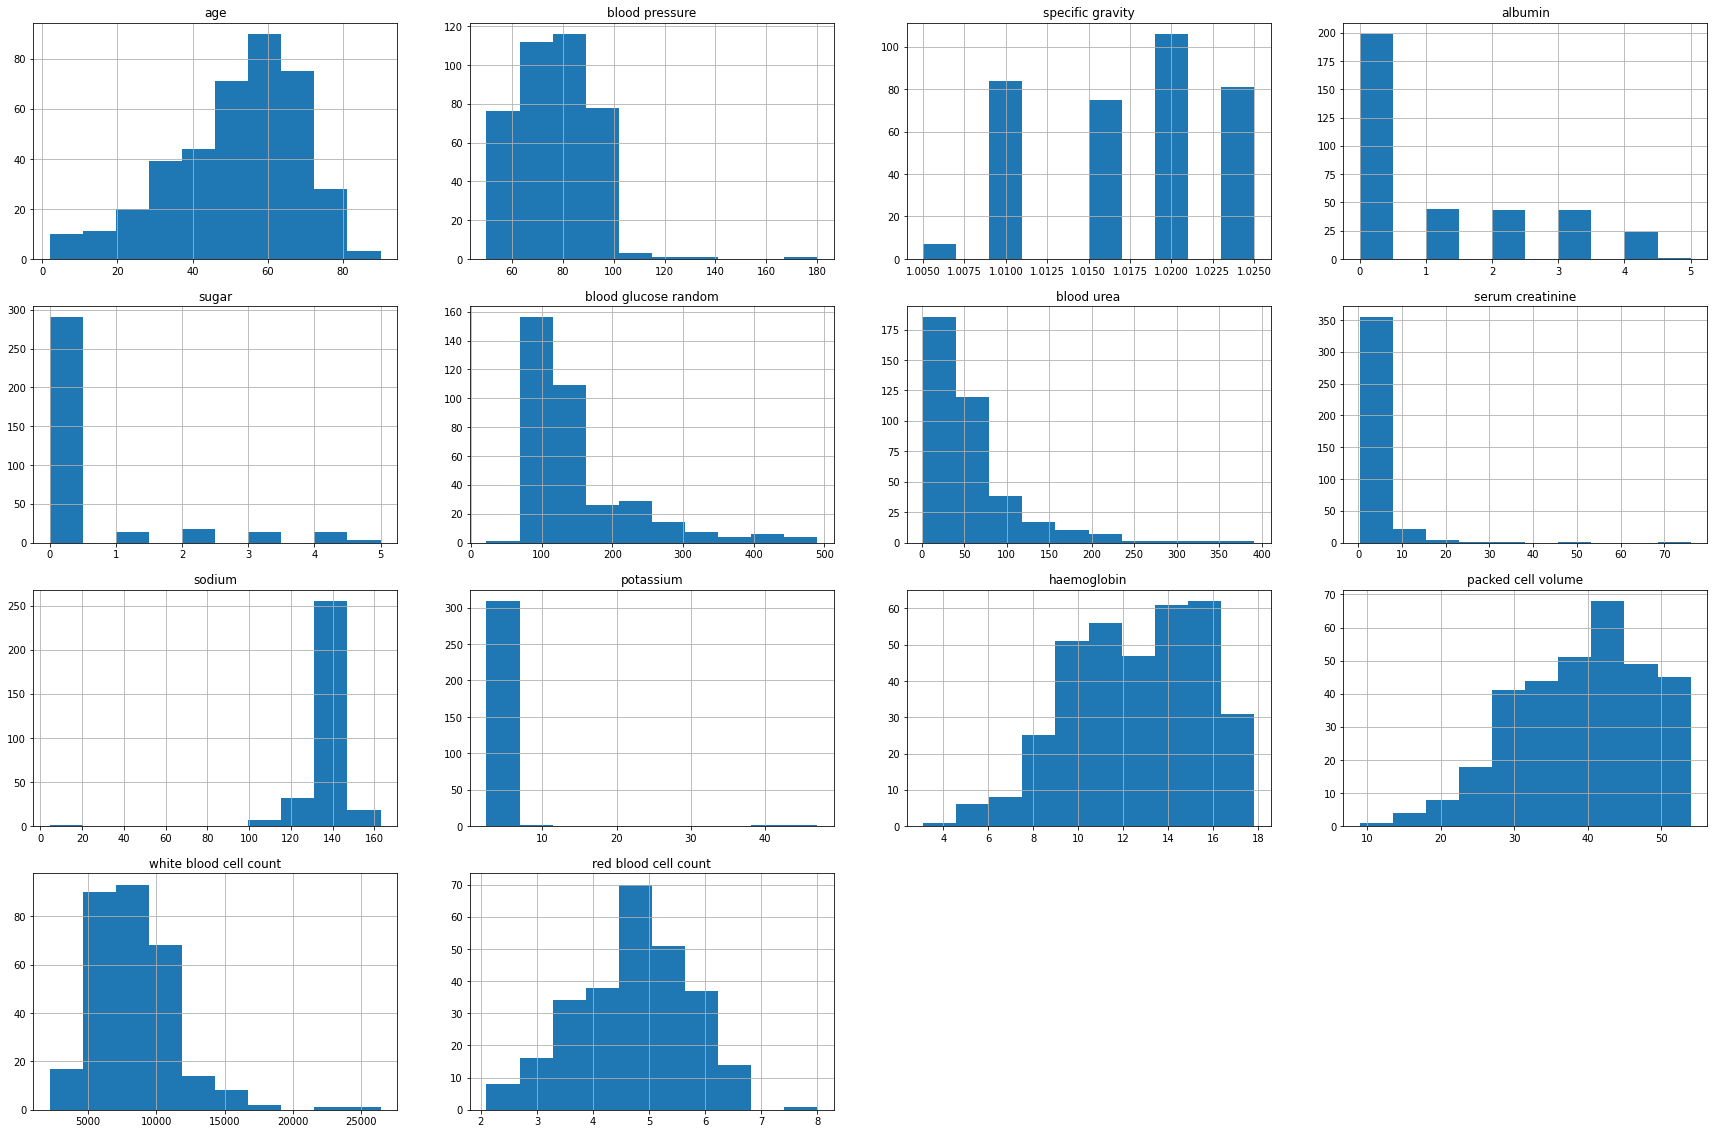

In [ ]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
  plt.subplot(4,4,i+1)
  df[feature].hist()
  plt.title(feature)

In [ ]:
len(cat_col)

11

**Customize the Data in plot graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

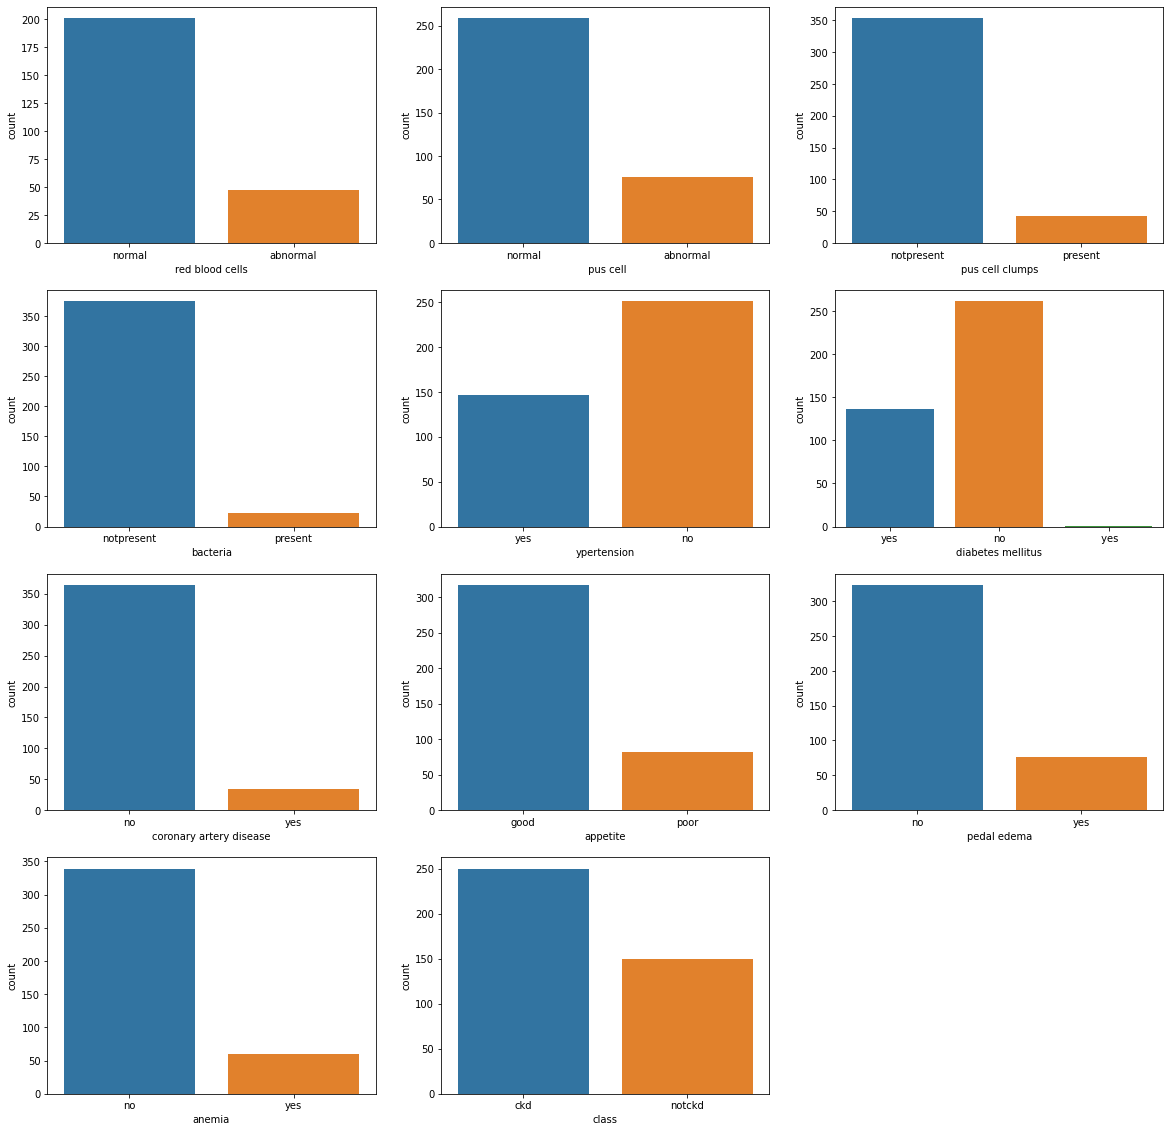

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(df[feature])

**Perform the count plot on target feature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


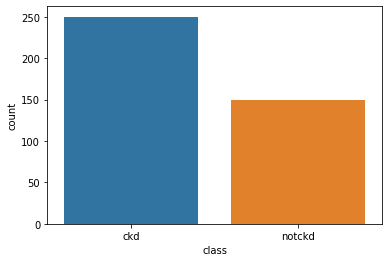

In [ ]:
sns.countplot(df['class'])

In [ ]:
df.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


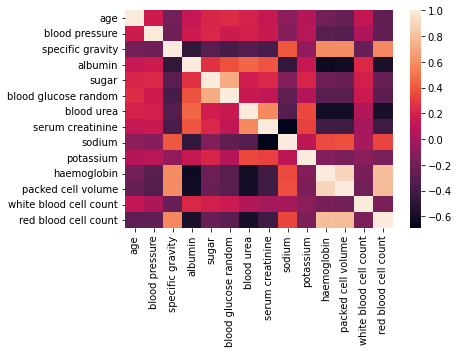

In [ ]:
sns.heatmap(df.corr())

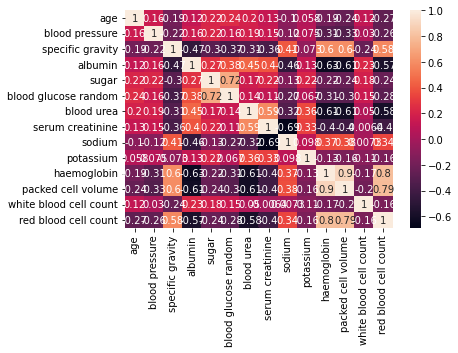

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Customize the graph**

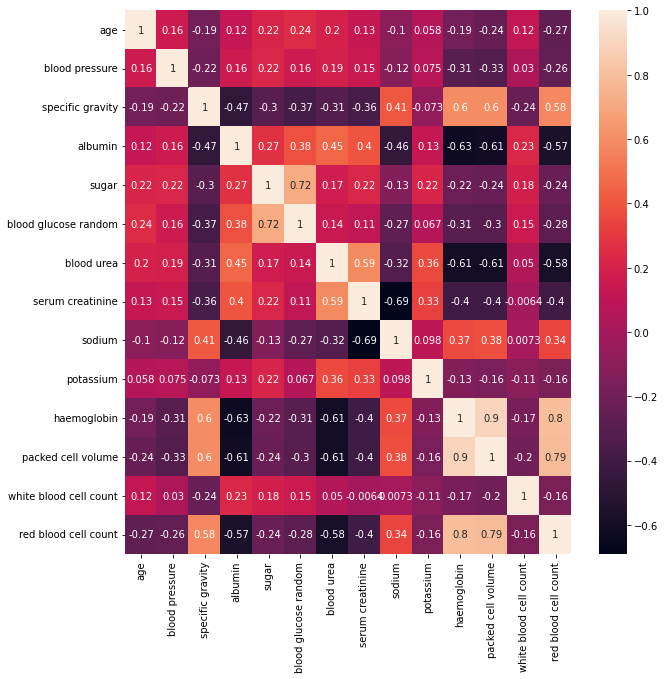

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**Grouping The Data**

In [ ]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [ ]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
df.groupby(['age','class'])['age'].agg(['count','mean','median','min','max'])

,,count,mean,median,min,max
age,class,,,,,
2.0,ckd,1,2.0,2.0,2.0,2.0
3.0,ckd,1,3.0,3.0,3.0,3.0
4.0,ckd,1,4.0,4.0,4.0,4.0
5.0,ckd,2,5.0,5.0,5.0,5.0
6.0,ckd,1,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...
80.0,notckd,2,80.0,80.0,80.0,80.0
81.0,ckd,1,81.0,81.0,81.0,81.0
82.0,ckd,1,82.0,82.0,82.0,82.0


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
px.violin(df,y='red blood cell count',x='class',color='class')

**Automate the plot**

In [ ]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
px.scatter(df,x='haemoglobin',y='packed cell volume')

**Creating Plot of the columns**

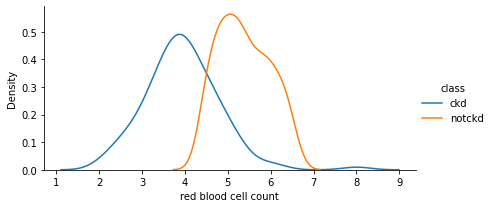

In [ ]:
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()


**Function to automate all these task**

In [ ]:
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class')
  return fig.show()

In [ ]:
def scatters(col1,col2):
  fig=px.scatter(df,x=col1,y='col2',color='class')
  return fig.show()

In [ ]:
def kde_plot(feature):
  grid=sns.FacetGrid(df,hue='class',aspect=2)
  grid.map(sns.kdeplot,feature)
  grid.add_legend()

In [ ]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
violin('sodium')

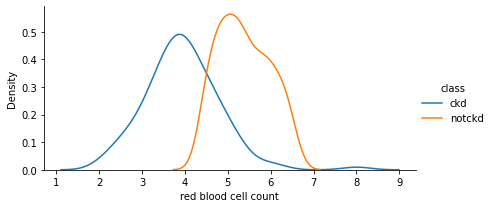

In [ ]:
kde_plot('red blood cell count')

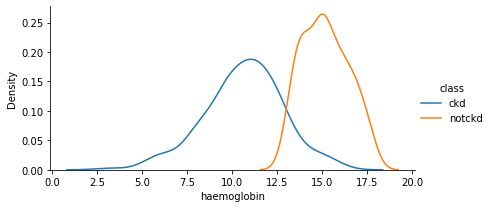

In [ ]:
kde_plot('haemoglobin')

In [ ]:
df.head(5)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


**Dealing with missing values**

In [ ]:
df.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

**Sorting**

In [ ]:
df.isna().sum().sort_values()

class                        0
pedal edema                  1
appetite                     1
anemia                       1
coronary artery disease      2
diabetes mellitus            2
ypertension                  2
pus cell clumps              4
bacteria                     4
age                          9
blood pressure              12
serum creatinine            17
blood urea                  19
blood glucose random        44
albumin                     46
specific gravity            47
sugar                       49
haemoglobin                 52
 pus cell                   65
packed cell volume          71
sodium                      87
potassium                   88
white blood cell count     106
red blood cell count       131
red blood cells            152
dtype: int64

**Sorting Descending**

In [ ]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



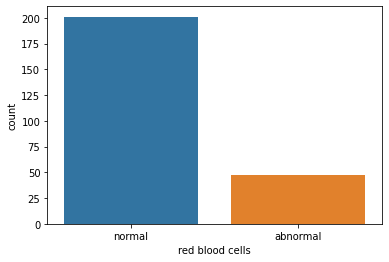

In [ ]:
sns.countplot(df['red blood cells'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



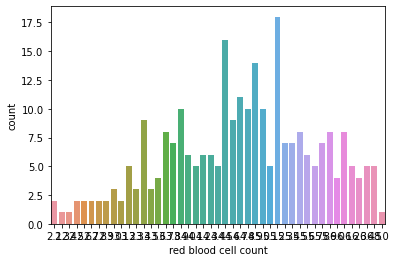

In [ ]:
sns.countplot(df['red blood cell count'])

**Copying the dataframe in another variable**

In [ ]:
data=df.copy()

In [ ]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


**Randomly selecting value using sample method**

In [ ]:
data['red blood cells'].dropna().sample()

107    normal
Name: red blood cells, dtype: object

In [ ]:
data['red blood cells'].isnull().sum()

152

In [ ]:
random_sample=data['red blood cells'].dropna().sample(152)
random_sample

83       normal
246    abnormal
143    abnormal
340      normal
239      normal
         ...   
315      normal
171      normal
212      normal
282      normal
167    abnormal
Name: red blood cells, Length: 152, dtype: object

**Filter to find the index of null values**

In [ ]:
data[data['white blood cell count'].isnull()].index

Int64Index([  6,  10,  13,  16,  17,  23,  28,  29,  30,  33,
            ...
            238, 239, 247, 273, 274, 287, 302, 319, 324, 330],
           dtype='int64', length=106)

**matching the index value of random values and empty cell in data **

In [ ]:
random_sample.index

Int64Index([ 83, 246, 143, 340, 239, 287, 127, 393, 328, 173,
            ...
            306, 157, 186,  33, 367, 315, 171, 212, 282, 167],
           dtype='int64', length=152)

In [ ]:
random_sample.index

Int64Index([ 83, 246, 143, 340, 239, 287, 127, 393, 328, 173,
            ...
            306, 157, 186,  33, 367, 315, 171, 212, 282, 167],
           dtype='int64', length=152)

In [ ]:
data[data['red blood cells'].isnull()].index


Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

**Assigning the sample data to null values in the dataframe**

In [ ]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


**Assign the sample data to original null values data**

In [ ]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

**checking again for any nullvalues in red blood cells column**

In [ ]:
data['red blood cells'].isnull().sum()

152

**checking the plot of red blood cell after removing null values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



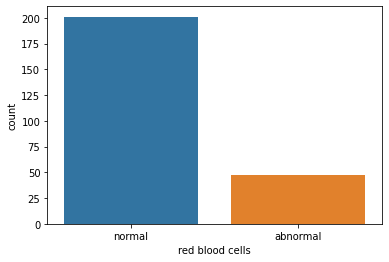

In [ ]:
sns.countplot(data['red blood cells'])

**writing function for all the columns having null values**

In [ ]:
def sample_generator(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:
data.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

**Checking missing values in numerical and categorical column**

In [ ]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [ ]:
for col in num_col:
  sample_generator(col)

In [ ]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [ ]:
data[cat_col].isnull().sum()

red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
for col in cat_col:
  sample_generator(col)

In [ ]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

**NOw the data is clean and not having a single dirtiness**

In [ ]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,136.0,3.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,132.0,18.0,0.8,140.0,3.8,11.3,38.0,6000.0,4.7,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,134.0,2.9,9.6,31.0,7500.0,3.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,143.0,4.8,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


**to get unique values in each column**

In [ ]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [ ]:
for col in num_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

age has 76 categories
blood pressure has 10 categories
specific gravity has 5 categories
albumin has 6 categories
sugar has 6 categories
blood glucose random has 146 categories
blood urea has 118 categories
serum creatinine has 84 categories
sodium has 34 categories
potassium has 40 categories
haemoglobin has 115 categories
packed cell volume has 42 categories
white blood cell count has 89 categories
red blood cell count has 45 categories


# Label Encoding
normal -0
abnormal -1
if any third then -2  

**using sklearn preprocessing class**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,3.4,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,132.0,18.0,0.8,140.0,3.8,11.3,38.0,6000.0,4.7,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,134.0,2.9,9.6,31.0,7500.0,3.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,143.0,4.8,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


**As now the data is ready for machine learning**

**Using Select K best technique **

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Finding independent features
#and dependent features 

**Here class is the target variable**

In [ ]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [ ]:
X=data[ind_col]
y=data[dep_col]

**Dispalying dependent variable and independent vairbale**

In [ ]:
X

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,3.4,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,132.0,18.0,0.8,140.0,3.8,11.3,38.0,6000.0,4.7,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,134.0,2.9,9.6,31.0,7500.0,3.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,143.0,4.8,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

**Apply K best Algorithm**

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f058a85f050>)

In [ ]:
ordered_feature.scores_

array([1.07899132e+02, 8.10145874e+01, 5.27561071e-03, 2.18122667e+02,
       8.22989011e+01, 1.10136223e+01, 1.54152505e+01, 2.26992248e+01,
       1.07855072e+01, 2.52328591e+03, 2.35083633e+03, 3.36739557e+02,
       2.80827975e+01, 3.28536288e+00, 1.27480184e+02, 2.79620017e+02,
       1.23751834e+04, 1.83641232e+01, 8.82000000e+01, 1.99004975e+01,
       1.79219048e+01, 4.92000000e+01, 4.56000000e+01, 3.34699454e+01])

In [ ]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])

In [ ]:
datascores

,Score
0,107.899132
1,81.014587
2,0.005276
3,218.122667
4,82.298901
5,11.013622
6,15.415251
7,22.699225
8,10.785507
9,2523.285910


In [ ]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [ ]:
feature_rank=pd.concat([dfcols,datascores],axis=1)
feature_rank

,0,Score
0,age,107.899132
1,blood pressure,81.014587
2,specific gravity,0.005276
3,albumin,218.122667
4,sugar,82.298901
5,red blood cells,11.013622
6,pus cell,15.415251
7,pus cell clumps,22.699225
8,bacteria,10.785507
9,blood glucose random,2523.285910


**Get Top 10 Features based upon scores**

In [ ]:
feature_rank.nlargest(10,'Score')

,0,Score
16,white blood cell count,12375.183398
9,blood glucose random,2523.285910
10,blood urea,2350.836326
11,serum creatinine,336.739557
15,packed cell volume,279.620017
3,albumin,218.122667
14,haemoglobin,127.480184
0,age,107.899132
18,ypertension,88.200000
4,sugar,82.298901


**Storing these in an array**

In [ ]:
feature_rank.columns=['features','Score']
feature_rank

,features,Score
0,age,107.899132
1,blood pressure,81.014587
2,specific gravity,0.005276
3,albumin,218.122667
4,sugar,82.298901
5,red blood cells,11.013622
6,pus cell,15.415251
7,pus cell clumps,22.699225
8,bacteria,10.785507
9,blood glucose random,2523.285910


In [ ]:
feature_rank.nlargest(10,'Score')

,features,Score
16,white blood cell count,12375.183398
9,blood glucose random,2523.285910
10,blood urea,2350.836326
11,serum creatinine,336.739557
15,packed cell volume,279.620017
3,albumin,218.122667
14,haemoglobin,127.480184
0,age,107.899132
18,ypertension,88.200000
4,sugar,82.298901


In [ ]:
selected_columns=feature_rank.nlargest(10,'Score')['features'].values

In [ ]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'ypertension', 'sugar'], dtype=object)

**Seperating it into new data frame**

In [ ]:
X_new=data[selected_columns]

In [ ]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,ypertension,sugar
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,1,0.0
1,6000.0,132.0,18.0,0.8,38.0,4.0,11.3,7.0,0,0.0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,0,3.0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,1,0.0
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0,0.0


In [ ]:
len(X_new)

400

In [ ]:
X_new.shape

(400, 10)

**This is our final data frame for model preparation**

In [ ]:
X_new

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,ypertension,sugar
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,1,0.0
1,6000.0,132.0,18.0,0.8,38.0,4.0,11.3,7.0,0,0.0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,0,3.0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,1,0.0
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,140.0,49.0,0.5,47.0,0.0,15.7,55.0,0,0.0
396,7800.0,75.0,31.0,1.2,54.0,0.0,16.5,42.0,0,0.0
397,6600.0,100.0,26.0,0.6,49.0,0.0,15.8,12.0,0,0.0
398,7200.0,114.0,50.0,1.0,51.0,0.0,14.2,17.0,0,0.0


**Creating a model for prediction**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.25)

In [ ]:
print(X_train.shape)

(300, 10)


In [ ]:
print(X_test.shape)

(100, 10)


In [ ]:
print(y_train.shape)

(300,)


In [ ]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

**Using XGboost algorithm **

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.2, max depth=10, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.2,
 'max depth': 10,
 'min_child_weight': 3}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.2, max depth=10, max_delta_step=0, max_depth=3,
              min_child_weight=3, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

SyntaxError: ignored

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=classifier.predict(X_test)

**Training**

In [140]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit( X_train , y_train )

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[61,  1],
       [ 2, 36]])

In [141]:
y_pred = model.predict(X_test)
print(np.column_stack((y_pred,y_test)))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [143]:
X_new.columns

Index(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'ypertension', 'sugar'],
      dtype='object')

In [144]:
X_new.head(5)

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,ypertension,sugar
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,1,0.0
1,6000.0,132.0,18.0,0.8,38.0,4.0,11.3,7.0,0,0.0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,0,3.0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,1,0.0
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0,0.0


**Predicting whether a person has the chronic disease of not**

In [146]:
wbcc =int(input("Enter the white blood cell count	"))
bgr = int(input("Enter the blood glucose random	"))
Age = int(input("Enter the Age of Person "))
bu = float(input("Enter the Person's blood urea "))
sc = float(input("Enter the Person's serum creatinine "))
pcv = float(input("Enter the Person's packed cell volume "))
pa = float(input("Enter the Person's albumin "))
p_h = float(input("Enter the Person's haemoglobin "))
p_yp = float(input("Enter the Person's ypertension "))
p_s = float(input("Enter the Person's sugar "))


person = [[wbcc,bgr,Age,bu,sc,pcv,pa,p_h,p_yp,p_s]]
result = model.predict(person)
print(result)

if result ==1:
  print("Person Might have chronic kidney disease")
else:
  print("Person Might not have chronic kidney disease")

Enter the white blood cell count	2500
Enter the blood glucose random	3200
Enter the Age of Person 1422
Enter the Person's blood urea 6322
Enter the Person's serum creatinine 2355
Enter the Person's packed cell volume 3200
Enter the Person's albumin 6355
Enter the Person's haemoglobin 9655
Enter the Person's ypertension 3200
Enter the Person's sugar 2400
[0]
Person Might not have chronic kidney disease


**Accuracy of my model**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {0}% ".format(accuracy_score(y_test,y_pred)*100))

**Thankyou**